In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
stock_features =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list = ['DATE'] + stock_features
df1 = df[col_list]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
DATE           41266 non-null int64
NASDAQ.AAPL    41266 non-null float64
NASDAQ.ADP     41266 non-null float64
NASDAQ.CBOE    41266 non-null float64
NASDAQ.CSCO    41266 non-null float64
NASDAQ.EBAY    41266 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [5]:
df1.isnull().sum()

DATE           0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [6]:
df1 =df1.copy()
df1['DATE'] =  pd.to_datetime(df1['DATE'])
df1.tail()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
41261,1970-01-01 00:00:01.504209360,164.11,106.565,100.89,32.185,36.135
41262,1970-01-01 00:00:01.504209420,164.12,106.590,100.88,32.200,36.130
41263,1970-01-01 00:00:01.504209480,164.01,106.520,100.86,32.200,36.130
41264,1970-01-01 00:00:01.504209540,163.88,106.400,100.83,32.195,36.120
41265,1970-01-01 00:00:01.504209600,163.98,106.470,100.89,32.225,36.130


In [7]:
df1 = df1.copy()
df1['Month'] = df1['DATE'].dt.date
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Month
0,1970-01-01 00:00:01.491226200,143.6800,102.2300,81.03,33.7400,33.3975,1970-01-01
1,1970-01-01 00:00:01.491226260,143.7000,102.1400,81.21,33.8800,33.3950,1970-01-01
2,1970-01-01 00:00:01.491226320,143.6901,102.2125,81.21,33.9000,33.4100,1970-01-01
3,1970-01-01 00:00:01.491226380,143.6400,102.1400,81.13,33.8499,33.3350,1970-01-01
4,1970-01-01 00:00:01.491226440,143.6600,102.0600,81.12,33.8400,33.4000,1970-01-01


In [8]:
col_list = ['Month']+ stock_features
df2 = df1[col_list]
df2.head()

,Month,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1970-01-01,143.6800,102.2300,81.03,33.7400,33.3975
1,1970-01-01,143.7000,102.1400,81.21,33.8800,33.3950
2,1970-01-01,143.6901,102.2125,81.21,33.9000,33.4100
3,1970-01-01,143.6400,102.1400,81.13,33.8499,33.3350
4,1970-01-01,143.6600,102.0600,81.12,33.8400,33.4000


In [9]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


In [11]:
final = df2.copy()
final['Month']=pd.to_datetime(final['Month'])

Time Series Forecasting for NASDAQ.AAPL

In [12]:
df_AAPL = final[['Month',stock_features[0]]]
df_AAPL.head()

,Month,NASDAQ.AAPL
0,1970-01-01,143.6800
1,1970-01-01,143.7000
2,1970-01-01,143.6901
3,1970-01-01,143.6400
4,1970-01-01,143.6600


In [13]:
df_AAPL.set_index('Month',inplace=True)
df_AAPL.head()

,NASDAQ.AAPL
Month,
1970-01-01,143.6800
1970-01-01,143.7000
1970-01-01,143.6901
1970-01-01,143.6400
1970-01-01,143.6600


In [14]:
df_AAPL.index

DatetimeIndex(['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01',
               ...
               '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
               '1970-01-01', '1970-01-01'],
              dtype='datetime64[ns]', name='Month', length=41266, freq=None)

Summary Statistics

In [15]:
df_AAPL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.16,144.64,149.945,155.065,164.51


Visualize the Data

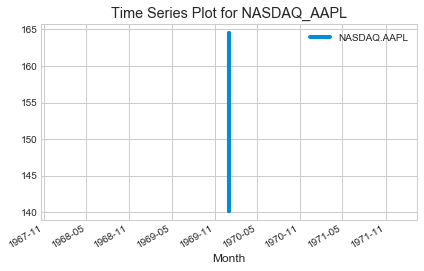

In [17]:
import seaborn as sns
sns.set_style('whitegrid')
df_AAPL.plot()
plt.title('Time Series Plot for NASDAQ_AAPL')
plt.show()

Plotting Rolling Statistics and check for stationarity :
The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

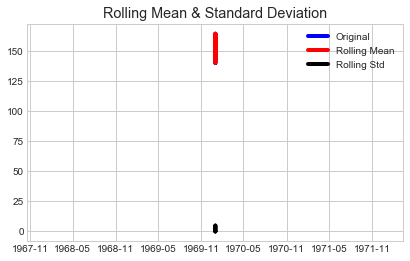


Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9128532997926697
p-value : 0.7837101772613857
#Lags Used : 31
Number of Observations Used : 41234
Crtical 1% : value -3.4305085998723857
Crtical 5% : value -2.8616100975579815
Crtical 10% : value -2.5668073106689477
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(timeseries)
    print('\nAugmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    for k,v in result[4].items():
        print('Crtical {} : value {}'.format(k,v))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


test_stationarity(df_AAPL['NASDAQ.AAPL'])

This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.

MAKING THE TIME SERIES STATIONARY
There are two major factors that make a time series non-stationary.
• Trend: non-constant mean
• Seasonality: Variation at specific time-frames

Differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

First Difference

In [19]:
df_AAPL = df_AAPL.copy()
df_AAPL.loc[:,'First_Difference'] = df_AAPL['NASDAQ.AAPL'] - df_AAPL['NASDAQ.AAPL'].shift(1)
df_AAPL.head()

,NASDAQ.AAPL,First_Difference
Month,,
1970-01-01,143.6800,NaN
1970-01-01,143.7000,0.0200
1970-01-01,143.6901,-0.0099
1970-01-01,143.6400,-0.0501
1970-01-01,143.6600,0.0200


In [20]:
df_AAPL = df_AAPL.copy()
df_AAPL.dropna(inplace=True)

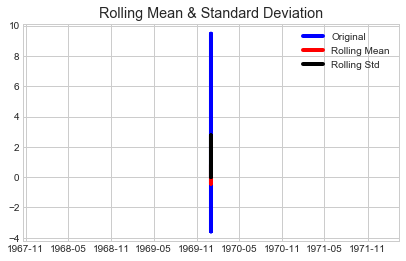


Augmented Dickey-Fuller Test:
ADF Test Statistic : -35.73774148340123
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
Crtical 1% : value -3.4305085998723857
Crtical 5% : value -2.8616100975579815
Crtical 10% : value -2.5668073106689477
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
#Test Staionarity
test_stationarity(df_AAPL['First_Difference'])

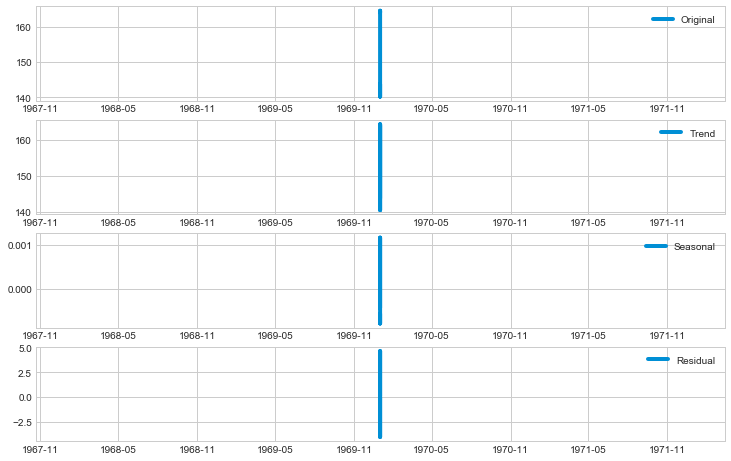

In [22]:
#Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_AAPL['NASDAQ.AAPL'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

Note:
The data is seasonal as interpreted from the Seasonal plot of seasonal decomposition.

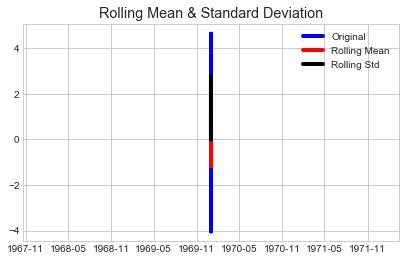


Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.04343353554282
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

This is stationary because:

• test statistic is lower than critical values.

• the mean and std variations have small variations with time.

***Autocorrelation and Partial Autocorrelation Plots ****

Autocorrelation Interpretation

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms

<Figure size 1440x576 with 0 Axes>

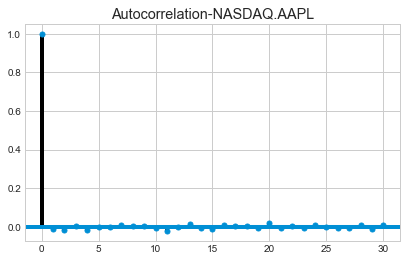

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(20,8))
fig_first = plot_acf(df_AAPL["First_Difference"],lags=30,title='Autocorrelation-NASDAQ.AAPL')

<Figure size 1440x576 with 0 Axes>

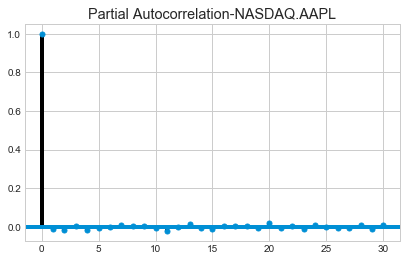

In [25]:
plt.figure(figsize=(20,8))
fig_pacf_first = plot_pacf(df_AAPL["First_Difference"],lags=30,title='Partial Autocorrelation-NASDAQ.AAPL')

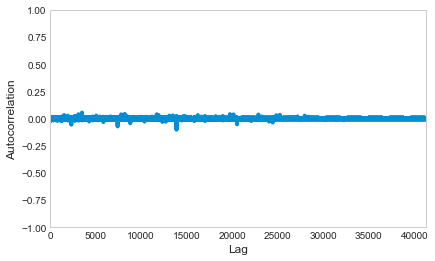

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_AAPL['First_Difference'])

**Forecasting a Time Series**
*Auto Regressive Integrated Moving Average(ARIMA)* —
It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences .

Now let’s check out on how we can figure out what value of p and q to use. We use two popular plotting techniques; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).

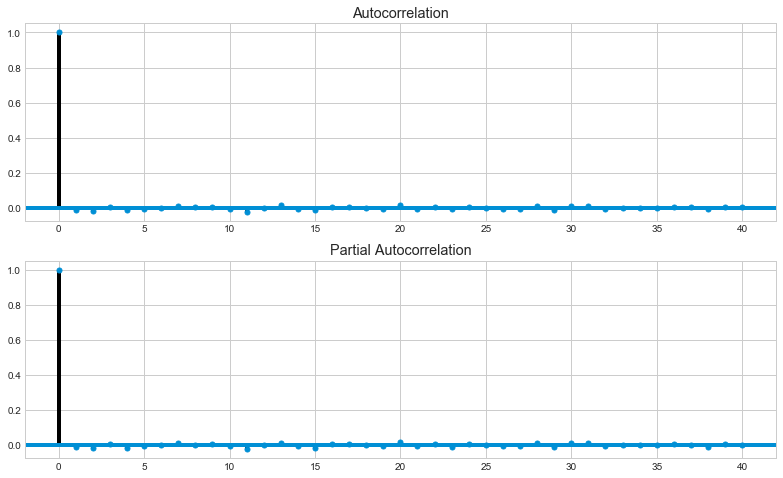

In [27]:

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_AAPL['First_Difference'].iloc[30:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_AAPL['First_Difference'].iloc[30:], lags=40, ax=ax2)

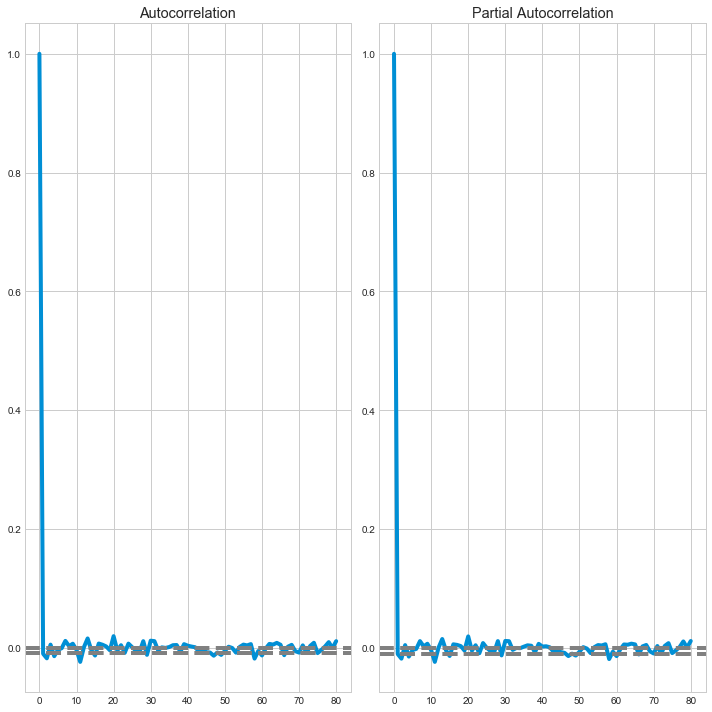

In [28]:
lag_acf = acf(df_AAPL['First_Difference'],nlags=80)
lag_pacf = pacf(df_AAPL['First_Difference'],nlags=80,method='ols')
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()

**Note**
The two dotted lines on either sides of 0 are the confidence intervals.

These can be used to determine the ‘p’ and ‘q’ values as:

• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.

• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

*Using the Seasonal ARIMA model*

In [29]:
model= sm.tsa.statespace.SARIMAX(df_AAPL['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\ANANYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\ANANYA\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24925.552
Date:                            Mon, 04 Mar 2019   AIC                         -49849.104
Time:                                    22:58:46   BIC                         -49840.476
Sample:                                         0   HQIC                        -49846.377
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.755      0.000       0.017       0.017
Ljung-Box (Q):                    1

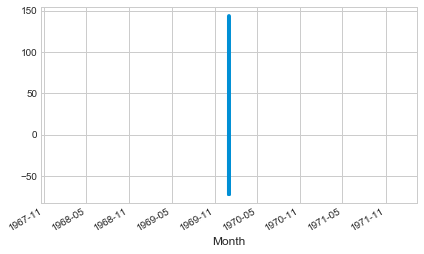

In [30]:
results.resid.plot()

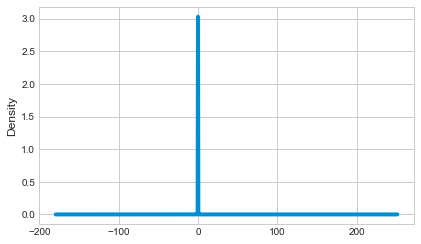

In [31]:
results.resid.plot(kind='kde')

In [32]:

df_AAPL = df_AAPL.copy()
df_AAPL['Forecast'] = results.predict()
df_AAPL.head()

,NASDAQ.AAPL,First_Difference,Forecast
Month,,,
1970-01-01,143.7000,0.0200,0.0000
1970-01-01,143.6901,-0.0099,143.7000
1970-01-01,143.6400,-0.0501,143.6901
1970-01-01,143.6600,0.0200,143.6400
1970-01-01,143.7800,0.1200,143.6600


*Prediction of Future Values*

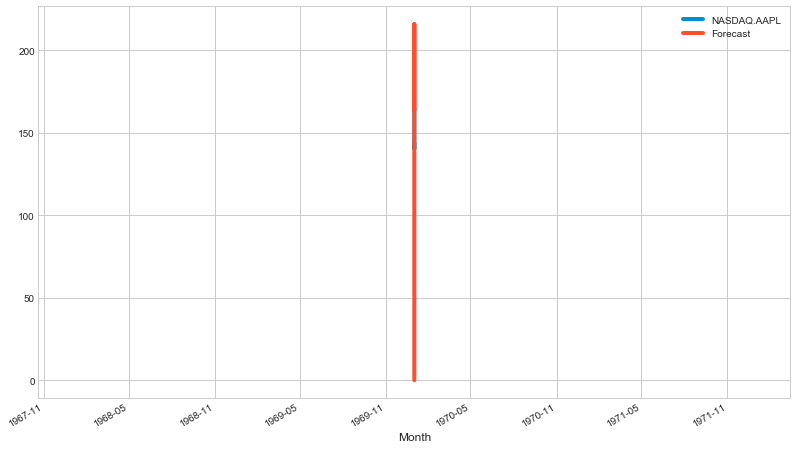

In [33]:
df_AAPL[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

In [36]:
results.forecast(step=10)

C:\Users\ANANYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


MemoryError: 

In [37]:
results.predict(start=41264,end=41274)

C:\Users\ANANYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


MemoryError: 

**Accuracy of the Forecast using MSE-Mean Squared Error**

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.6426408212261927
Mean Absolute Error NASDAQ.AAPL - 0.07550728219978
